# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**
So,
$$
p_\mathcal{N}(\mu;\mu_0,(\beta \tau)^{-1})=\frac{1}{\frac{2\pi}{\beta \tau}^{\frac{1}{2}}}\exp(-\frac{(\mu-\mu_0)^2\beta \tau}{2}),
$$

$$
\text{Gamma}(\tau; a, b)=\frac{b^a\tau^{a-1}}{\Gamma (a)}\exp \left(-b \tau \right)
$$

then:
$$
p(\mu, \tau) = 
\frac{b^a }{\Gamma(a)} \sqrt{\frac{\beta}{2\pi}} \tau^{a-\frac12} \exp \left(-b \tau \right) \exp\left( -\frac{(\mu-\mu_0)^2\beta\tau}{2} \right) \\  \\ \\
$$


Bayes' theorem: $$
p(\mu, \tau |x)={\frac {p(x|\mu, \tau )p(\mu, \tau )}{p(x)}} = {\frac {L(x; \mu, \tau )p(\mu, \tau )}{p(x)}}
$$


from Bayes theorem:
$$
P(\tau,\mu|x)\propto \prod _{i=1}^{n} \tau^\frac{1}{2} \exp(\frac{-\tau}{2}(x_i-\mu)^2)\propto \tau^\frac{1}{2} \exp(\frac{-\tau}{2} \sum_{i=1}^n(x_i-\bar x+\bar x-\mu)^2)\propto\tau^\frac{1}{2} \exp(\frac{-\tau}{2} \left(n\sigma^2+n(\bar x-\mu)^2\right)
$$

then
$$
p(\mu, \tau |x) \propto  \tau^ \frac n2 \exp (-\frac{\tau}{2} (n\sigma^2+n(\bar x - \mu)^2) )
 \tau^{a-\frac12} \exp (-b \tau ) \exp (-\frac{(\mu-\mu_0)^2\beta\tau}{2} )
\propto
 \tau^{a + \frac n2 -\frac12} exp ( -b \tau - \frac{n\sigma^2\tau}{2} - \frac{\tau}{2} ( \beta (\mu - \mu_0)^2 + n(x - \mu)^2 ) )
$$

so,
$$
\beta (\mu - \mu_0)^2 + n(x - \mu)^2 )=\beta \mu^2-2\beta \mu \mu_0+\beta \mu_0^2+n\mu^2-2n\bar x \mu +n \bar x^2= {\frac  {\beta n(\bar x -\mu_0)^2}{\beta+n}} + (\beta+n)(\mu -{\frac  {\beta \mu _{0}+n{\bar x}}{\beta +n}})^{2}
$$

and finally:
$$
p(\mu, \tau |x) \propto \mathcal{N}(\mu; \frac{\beta \mu_0+n \bar x}{ \beta+n}, ((\beta+n) \tau)^{-1})
            \otimes \text{Gamma}(\tau; a+\frac n2, b + \frac 12 (n\sigma^2+\frac  {\beta n(\bar x-\mu_0)^2}{\beta+n})     )  
$$

**END Solution**

references:Bishop - Pattern Recognition And Machine Learning - Springer  2006 p.102

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [2]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np
import numpy as np
from scipy.stats import multivariate_normal

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
### BEGIN Solution
x=np.array([2/3,1/6,1/6])
sigma=np.array([[1,-0.25,0.75],[-0.25,1,0.5],[0.75,0.5,2]])

func = lambda w: multivariate_normal.pdf(w, np.zeros(3), cov=sigma)/(1+np.exp(-w@x))
func_log = lambda w: multivariate_normal.logpdf(w, np.zeros(3), cov=sigma) - np.log(1+np.exp(-w@x))
func1 = lambda w: -func(w)
w = minimize(func1, np.zeros(3)).x
hess = nd.Hessian(func_log)
result = (2*np.pi)**(3/2)*func(w)/np.sqrt(np.linalg.det(-hess(w)))
print('the value of integral:',result)
### END Solution

the value of integral: 0.49791974987893484


<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [4]:
import torch
from torch.autograd import Variable, grad

In [5]:
### BEGIN Solution
x = torch.FloatTensor(x)

def log(w):
    p=1/(2*np.pi)**(3/2)/np.linalg.det(sigma)**(0.5)*torch.sigmoid(torch.dot(w,x))*torch.exp(-0.5*w@torch.FloatTensor(np.linalg.inv(sigma))@w)
    return -torch.log(p)


intp = torch.tensor(w, requires_grad=True).float()
y = log(intp)
grads = grad(y, intp, create_graph=True)[0]
    
H = np.diag(np.diag([grad(_grad, intp, create_graph=True)[0].data.numpy() for _grad in grads]))   


pw=1/(2*np.pi)**(3/2)/np.linalg.det(sigma)**(0.5)*torch.sigmoid(torch.dot(torch.FloatTensor(w.copy()),x))*\
    torch.exp(-0.5*torch.FloatTensor(w.copy())@\
              torch.FloatTensor(np.linalg.inv(sigma))@torch.FloatTensor(w.copy()))

result_torch = float(((2*np.pi)**(3/2) / np.linalg.det(H)**(0.5)) * pw)
print('Integral value is', result_torch)
### END Solution

Integral value is 0.2964309751987457


<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [6]:
### BEGIN Solution
N=100000
from scipy.stats import multivariate_normal
x=np.array([2/3,1/6,1/6])
monte_carlo=np.mean(1./(np.exp(-multivariate_normal.rvs(np.zeros(3), sigma,N)@x)+1))
print('result monte carlo:',monte_carlo)
relative_error1=np.abs(result-monte_carlo)/monte_carlo
relative_eror2=np.abs(result_torch-monte_carlo)/monte_carlo

print('Relative error, 1 case= ',relative_error1)
print('Relative error, 2 case= ',relative_eror2)
### END Solution

result monte carlo: 0.5001636712718128
Relative error, 1 case=  0.004486374204612185
Relative error, 2 case=  0.40733205503513875


Relative error in second case bigger, because in 2nd case(diagonal approximation of hessian) because we use diagonal Hessian, we loose some information.


<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**
$$
\left({\begin{array}{rr|rr}A&B&I&0\\C&D&0&I\end{array}}\right)
$$
first row $* A^{-1}$

$$
 \left({\begin{array}{rr|rr}I&A^{-1}B&A^{-1}&0\\C&D&0&I\end{array}}\right)
$$

2nd row - first row*$C$

$$
\left({\begin{array}{rr|rr}I&A^{-1}B&A^{-1}&0\\0&D-CA^{-1}B&-CA^{-1}&I\end{array}}\right)
$$

2nd row $*(D-CA^{-1}B)^{-1}$
$$
\left({\begin{array}{rr|rr}I&A^{-1}B&A^{-1}&0\\0&I&-(D-CA^{-1}B)^{-1}CA^{-1}&(D-CA^{-1}B)^{-1}\end{array}}\right)
$$

first row -2nd row$*A^{-1}B$
$$
 \left({\begin{array}{rr|rr}I&0&A^{-1} + A^{-1}B(D-CA^{-1}B)^{-1}CA^{-1} &-A^{-1}B(D-CA^{-1}B)^{-1}\\0&I&-(D-CA^{-1}B)^{-1}CA^{-1}&(D-CA^{-1}B)^{-1}\end{array}}\right)
$$

Also we need to say that Thus, $D-CA^{-1}B$ must be invertable too.

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**
from lecture 14, p.25 we know that condition on training outputs we get:

$p(f_*|y)-\mathcal{N}(f^*|\mu_*, \sigma_*)$

$\mu_*-k_*^T[K+\sigma I]^{-1}y$

$\sigma-K_{**}-k_*^T[K+\sigma I]^{-1}k_*$

in our case $\epsilon ~\mathcal{N}(0,\sigma A)$, where $A=\begin{bmatrix}0 & 0 \\\ 0& \sigma I\end{bmatrix}$

then we have $p(y^*|D)=\mathcal{N}(f^*|\mu, \Sigma)$, where $\Sigma$= covarience matrixб $\Sigma=K_{**}-k_{*}^T[K+A]^{-1}k_{*}$

$\mu^*=k^*[K+A]^{-1}y$ and finally $K+A=\begin{bmatrix}K_{11} & K_{12} \\\ K_{21}& K_{21}+\sigma I\end{bmatrix}$

then according task 3.1 we can derivite $(K+A)^{-1}$

$$
(K+A)^{-1}=\begin{bmatrix}K_{11}^{-1}+K_{11}^{-1}K_{12}[K_{22}+\sigma I -K_{21}K_{11}^{-1}K_{12}]^{-1} & -K_{11}^{-1}K_{12}[K_22+\sigma I-K_{21}K_{11}^{-1}K{12}]^{-1} \\\ -[K_22+\sigma I-K_{21}K_{11}^{-1}K_{12}]^{-1}K_{21}K_{11}^{-1}& [K_{22}+\sigma I-K_{21}K_{11}^{-1}K_{12}]^{-1}\end{bmatrix}
$$

$p(y^*|D)=\mathcal{N}(f^*|\mu^*,\Sigma)$, where 

$$
\Sigma=K_{**}-k_*^T\begin{bmatrix}K_{11}^{-1}+K_{11}^{-1}K_{12}[K_{22}+\sigma I -K_{21}K_{11}^{-1}K_{12}]^{-1} & -K_{11}^{-1}K_{12}[K_22+\sigma I-K_{21}K_{11}^{-1}K{12}]^{-1} \\\ -[K_22+\sigma I-K_{21}K_{11}^{-1}K_{12}]^{-1}K_{21}K_{11}^{-1}& [K_{22}+\sigma I-K_{21}K_{11}^{-1}K_{12}]^{-1}\end{bmatrix} k_*
$$
**END Solution**

references: Lecture 14, p.25
https://www.stat.ubc.ca/~will/cx/private/mod2_gp.pdf
https://www.cse.iitk.ac.in/users/piyush/courses/pml_winter16/slides_lec12.pdf
https://people.eecs.berkeley.edu/~pabbeel/cs287-fa11/slides/Gaussians-v2.pdf (page 10)


<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
### BEGIN Solution
data=pd.read_csv('data\monthly_co2_mlo.csv')

data=data.sort_values('year')
data[data==-99.99]=np.nan
df=data.dropna()
CO=df['CO2 [ppm]']
index=df[df.columns[0]]-1958
CO.index=index
X_train,X_test=train_test_split(CO,test_size=0.225,random_state=42,shuffle=False)
index_train=index[:len(X_train)]
index_test=index[len(X_train):]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1,1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))
test_scal = pd.Series(X_test_scaled.ravel(), index = index_test)
train_scal = pd.Series(X_train_scaled.ravel(), index = index_train)
### END Solution

Text(0,0.5,'CO2')

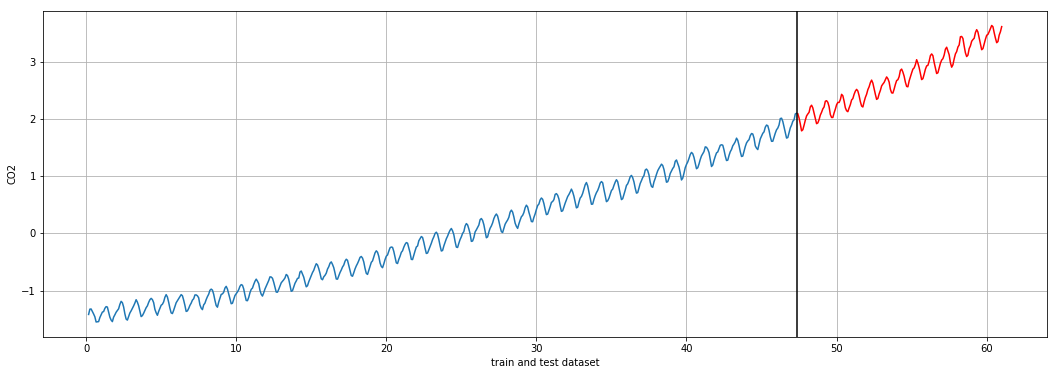

In [8]:
# >>> your code here <<<
plt.figure(figsize=(18,6))
train_scal.plot(grid=True)
test_scal.plot(grid=True,c='r')
plt.axvline(x=index_train.values[-1],c='black')
plt.xlabel('train and test dataset')
plt.ylabel('CO2')

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [9]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

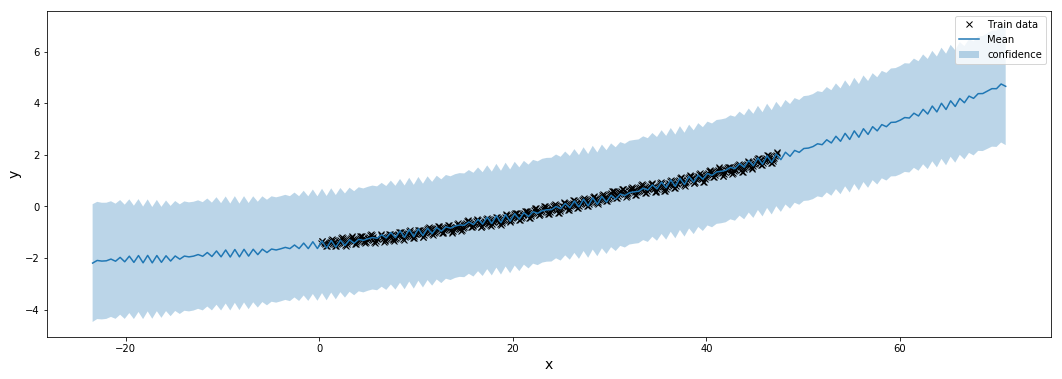

In [10]:
### BEGIN Solution
#import GPy
def plot_model(model, xlim=None):
    if xlim is None:
        xmin = np.min(model.X)
        xmax = np.max(model.X)
        x_range = xmax - xmin
        xlim = [xmin - 0.5 * x_range,
                xmax + 0.5 * x_range]
    
    x = np.linspace(xlim[0], xlim[1], 200).reshape(-1, 1)
    prediction, variance = model.predict(x)
    std = np.sqrt(variance).ravel()
    prediction = prediction.ravel()
    plt.figure(figsize=(18,6))
    plt.plot(model.X, model.Y, 'xk', label='Train data')
    plt.plot(x, prediction, label='Mean')
    plt.fill_between(x.ravel(), prediction - 2*std,
                     prediction + 2*std, alpha=0.3,label='confidence')
    
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend()

kernel = Poly(input_dim=1, order=2) + StdPeriodic(input_dim=1)
    
model = GPRegression(index_train.values.reshape(-1, 1), train_scal.values.reshape(-1, 1), kernel)
#model.optimize()
y_pred = model.predict(index_test.values.reshape(-1, 1))[0]
y_pred = pd.Series(y_pred.ravel(), index=index_test)

plot_model(model)

### END Solution

Text(0.5,0,'True value')

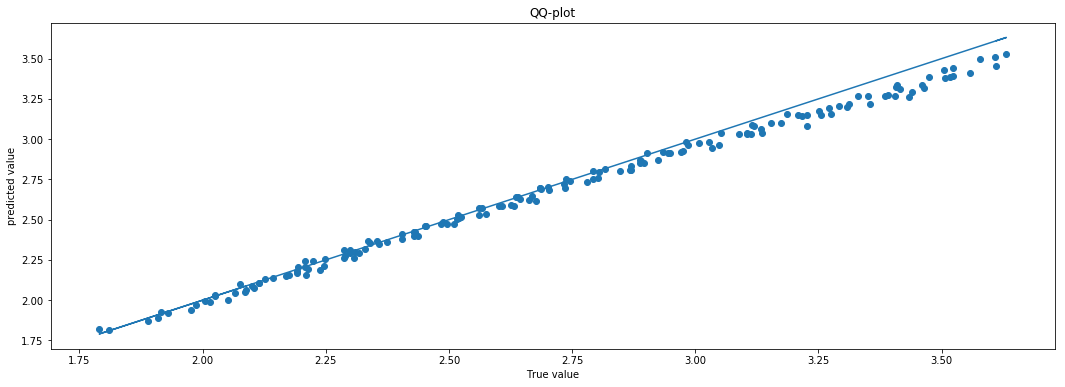

In [11]:
plt.figure(figsize=(18,6))
plt.plot(test_scal,test_scal)
plt.scatter(test_scal,y_pred)
plt.title('QQ-plot')
plt.ylabel('predicted value')
plt.xlabel('True value')

In [12]:
r2_score(test_scal,y_pred)


0.9850270171636715